In [ ]:
import datetime
import json
import os
import pprint
import random
import string
import sys
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Measure test execution time
!pip install ipython-autotime
%load_ext autotime

time: 179 µs


## Setting up colab with TPU and PYCARET

In [ ]:
assert 'COLAB_TPU_ADDR' in os.environ, 'ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!'
TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
print('TPU address is => ', TPU_ADDRESS)


TPU address is =>  grpc://10.43.146.122:8470
time: 1.69 ms


In [ ]:
#import pycaret
!pip install pycaret

     |████████████████████████████████| 256kB 6.8MB/s 
     |████████████████████████████████| 174kB 53.2MB/s 
     |████████████████████████████████| 266kB 52.2MB/s 
     |████████████████████████████████| 13.9MB 20.3MB/s 
     |████████████████████████████████| 276kB 55.5MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 66.3MB 91kB/s 
     |████████████████████████████████| 1.8MB 47.5MB/s 
     |████████████████████████████████| 6.8MB 51.9MB/s 
     |████████████████████████████████| 148.9MB 44kB/s 
     |████████████████████████████████| 1.6MB 54.8MB/s 
     |████████████████████████████████| 3.1MB 39.9MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 604kB 56.8MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 337kB 57.2MB/s 
     |████████████████████████████████| 153kB 58.9MB/s 

In [ ]:
# define cost helper function:
def cost(FN, FP):
  'taking the count of False positive (TP) and  count of False Negative'
  return 500*FN + 10*FP

time: 1.4 ms


In [ ]:
import pandas as pd

path = "https://github.com/DrewLarsen2757/SMU_QTW/raw/master/Final_Case_Study/Cleaned_final_dataset.zip"
dataset = pd.read_csv(path)

dataset.shape

(158392, 52)

time: 4.65 s


In [ ]:
data = dataset.sample(frac=0.90, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (142553, 52)
Unseen Data For Predictions: (15839, 52)
time: 127 ms


In [ ]:
from pycaret.classification import *

time: 2.29 s


In [ ]:
pycaret_session = setup(data = data, target = 'y', session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(142553, 52)"
5,Missing Values,False
6,Numeric Features,48
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


time: 3min 50s


In [ ]:
best_model = compare_models()# default 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9354,0.9804,0.9102,0.9274,0.9187,0.8651,0.8652,30.631
xgboost,Extreme Gradient Boosting,0.9221,0.9739,0.8902,0.9135,0.9017,0.8372,0.8374,8.941
rf,Random Forest Classifier,0.9160,0.9714,0.8575,0.9276,0.8912,0.8230,0.8247,3.658
lightgbm,Light Gradient Boosting Machine,0.9072,0.9665,0.8643,0.9004,0.8820,0.8055,0.8060,0.565
et,Extra Trees Classifier,0.9058,0.9684,0.8296,0.9281,0.8761,0.8005,0.8038,2.022
dt,Decision Tree Classifier,0.8393,0.8334,0.8038,0.7973,0.8005,0.6660,0.6660,1.282
gbc,Gradient Boosting Classifier,0.8383,0.9147,0.7474,0.8324,0.7876,0.6576,0.6601,21.743
ada,Ada Boost Classifier,0.7377,0.8060,0.6043,0.7008,0.6490,0.4414,0.4445,4.246
ridge,Ridge Classifier,0.7014,0.0000,0.5046,0.6697,0.5755,0.3522,0.3606,0.118
lda,Linear Discriminant Analysis,0.7014,0.7589,0.5086,0.6679,0.5775,0.3530,0.3609,0.615


time: 13min 39s


## precision vs recall vs f1 score staring with f1 as the average of trade off between precision and recall:

## starting with f 1 score for general assessment of model peformance
Precision is more important than recall when you would like to have less False Positives in trade off to have more False Negatives. Meaning, getting a False Positive is very costly, and a False Negative is not as much.

In a zombie apocalypse, of course you would try to accept as many as healthy people you can into your safe zone, but you really dont want to mistakenly pass a zombie into the safe zone. So if your method causes some of the healthy people mistakenly not to get into the safe zone, then so be it.

In [ ]:
# after the  basic model comparaison here is the best model
print( " the best base model is definced as {}". format(best_model))
evaluate_model(best_model)


 the best base model is definced as <catboost.core.CatBoostClassifier object at 0x7f3984cc4d30>


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

time: 371 ms


## steps:
## 1. after quick assessment  create few model using the general assesment on the baseline
## 2. after creating  and fine turning each model do a quick comoaraison cost function to evauate which one give a lower cost. 

## 3. select the best model and finalize it   by plot it  AUC , precision recall  and feature importance

## 4. last step will be on  predicting on the hold set and evaluate the cost on the hold set 
## 5. and some intepretation of the final model

In [ ]:
# 'For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

# Decision Tree Classifier ('dt')
# K Neighbors Classifier ('knn')
# Random Forest Classifier ('rf')'



# out of the 16 model we will select the following: 

# 1.    random forest
# 2.    logistic regression 

time: 1.58 ms


## CREATE AND FINE TUNE MODEL
After assessing and comparing the 16 model from pycaret, we will select 2~3 that we will train and fine tune and evaluate the cost function. we selected the following:
1.    random forest
2.    logistic regression 
3.    catboost

### 1. Random forest

####        a. create a model        

In [ ]:
## train and test model using CV of 10 fold
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9135,0.9707,0.8487,0.9297,0.8873,0.8174,0.8196
1,0.9164,0.9716,0.8541,0.9319,0.8913,0.8236,0.8257
2,0.9160,0.9707,0.8576,0.9276,0.8913,0.8230,0.8247
3,0.9164,0.9723,0.8579,0.9284,0.8917,0.8238,0.8255
4,0.9170,0.9709,0.8559,0.9317,0.8922,0.8249,0.8269
5,0.9153,0.9723,0.8594,0.9242,0.8906,0.8217,0.8231
6,0.9187,0.9731,0.8664,0.9263,0.8953,0.8290,0.8303
7,0.9128,0.9687,0.8554,0.9217,0.8873,0.8163,0.8179
8,0.9138,0.9707,0.8526,0.9267,0.8881,0.8182,0.8201
9,0.9199,0.9733,0.8676,0.9281,0.8968,0.8315,0.8328


time: 43.8 s


In [ ]:
# print  basic model
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
time: 1.58 ms


#### b. Tune a model

In [ ]:
 #tune the model using auto gridsearch
 #based on user cost function the minimal cost is achieve using a highest recall
 #tuned using recall
 tuned_rf = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4012,0.5,1.0,0.4012,0.5727,0.0,0.0
1,0.4012,0.5,1.0,0.4012,0.5727,0.0,0.0
2,0.4012,0.5,1.0,0.4012,0.5727,0.0,0.0
3,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
4,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
5,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
6,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
7,0.4012,0.5,1.0,0.4012,0.5726,0.0,0.0
8,0.4012,0.5,1.0,0.4012,0.5726,0.0,0.0
9,0.4012,0.5,1.0,0.4012,0.5726,0.0,0.0


time: 14min 53s


In [ ]:
#print model parameter
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
time: 1.55 ms


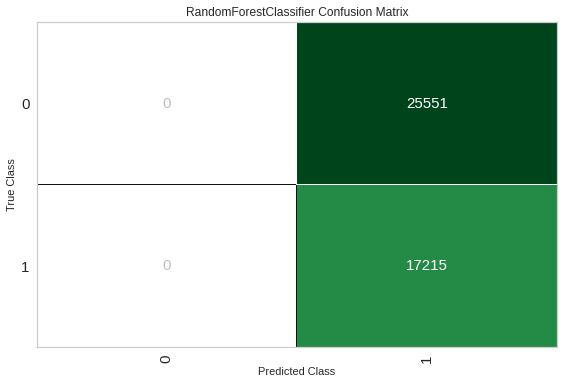

time: 780 ms


In [ ]:
#confusion matrix and cost function
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
## print cost value
print("the cost assiciate to the tuned model is ${}".format(cost(0,25551))) #cost(FN, FP):

the cost assiciate to the tuned model is $255510
time: 1.18 ms


In [ ]:
# tune using f1 score 
tuned_rf_f1 = tune_model(rf, optimize = 'f1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7859,0.8478,0.7512,0.7250,0.7379,0.5570,0.5572
1,0.7839,0.8490,0.7682,0.7147,0.7405,0.5558,0.5569
2,0.7762,0.8403,0.7450,0.7111,0.7276,0.5379,0.5383
3,0.7793,0.8417,0.7434,0.7169,0.7299,0.5435,0.5438
4,0.7793,0.8403,0.7372,0.7196,0.7283,0.5426,0.5427
5,0.7782,0.8426,0.7517,0.7117,0.7311,0.5427,0.5433
6,0.7831,0.8444,0.7622,0.7157,0.7382,0.5534,0.5542
7,0.7742,0.8438,0.7734,0.6970,0.7332,0.5384,0.5406
8,0.7766,0.8428,0.7399,0.7137,0.7266,0.5379,0.5381
9,0.7798,0.8495,0.7654,0.7089,0.7361,0.5477,0.5489


time: 21min 34s


In [ ]:
#print model parameter
print(tuned_rf_f1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
time: 1.44 ms


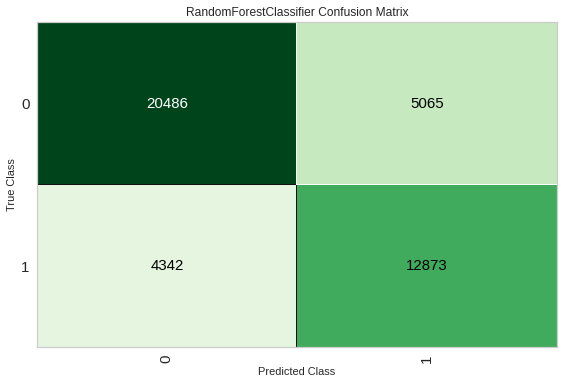

time: 1.08 s


In [ ]:
#confusion matrix and cost function
plot_model(tuned_rf_f1, plot = 'confusion_matrix')

In [ ]:
## print cost value
print("the cost assiciate to the tuned model is ${}".format(cost(4342,5065))) #cost(FN, FP):


the cost assiciate to the tuned model is $2221650
time: 1.11 ms


looking at the two turned model based on recall and  f1 score , we can clearly see that we will be saving ~ 2 Million if we using  best model under recall  instead of f1 score 

### 1. Cat boost

####        a. create a model        

In [ ]:
## train and test model using CV of 10 fold
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9341,0.9800,0.9031,0.9305,0.9166,0.8621,0.8624
1,0.9338,0.9803,0.9063,0.9269,0.9165,0.8616,0.8618
2,0.9377,0.9807,0.9111,0.9320,0.9214,0.8698,0.8699
3,0.9371,0.9808,0.9123,0.9295,0.9208,0.8686,0.8687
4,0.9354,0.9806,0.9093,0.9281,0.9186,0.8650,0.8651
5,0.9331,0.9799,0.9096,0.9225,0.9160,0.8603,0.8604
6,0.9359,0.9815,0.9166,0.9230,0.9198,0.8664,0.8664
7,0.9335,0.9788,0.9046,0.9277,0.9160,0.8609,0.8611
8,0.9354,0.9806,0.9096,0.9279,0.9186,0.8650,0.8651
9,0.9381,0.9808,0.9193,0.9258,0.9225,0.8709,0.8710


time: 5min 14s


In [ ]:
# print  basic model
print(catboost)

time: 1.06 ms


#### b. Tune a model

In [ ]:
 #tune the model using auto gridsearch
 #based on user cost function the minimal cost is achieve using a highest recall
 #tuned using recall
 tuned_catboost = tune_model(catboost, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9070,0.9669,0.8541,0.9086,0.8805,0.8045,0.8056
1,0.9087,0.9670,0.8631,0.9049,0.8835,0.8085,0.8092
2,0.9063,0.9666,0.8591,0.9027,0.8804,0.8034,0.8041
3,0.9084,0.9685,0.8596,0.9072,0.8828,0.8077,0.8085
4,0.9071,0.9670,0.8539,0.9090,0.8806,0.8047,0.8058
5,0.9068,0.9659,0.8634,0.9002,0.8814,0.8047,0.8052
6,0.9089,0.9676,0.8686,0.9008,0.8844,0.8093,0.8096
7,0.9062,0.9649,0.8586,0.9028,0.8802,0.8032,0.8039
8,0.9079,0.9668,0.8601,0.9056,0.8823,0.8067,0.8074
9,0.9096,0.9687,0.8631,0.9071,0.8845,0.8103,0.8110


time: 4min 54s


In [ ]:
#print model parameter
print(tuned_catboost)

time: 1.27 ms


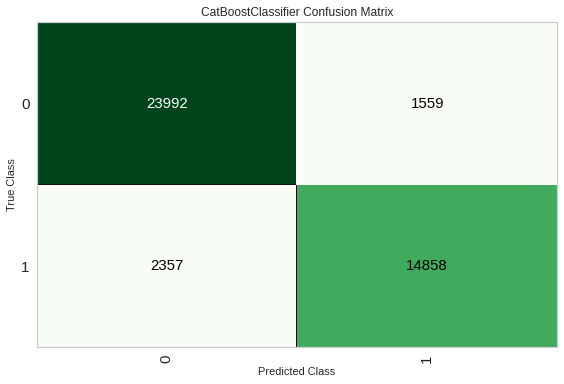

time: 540 ms


In [ ]:
#confusion matrix and cost function
plot_model(tuned_catboost, plot = 'confusion_matrix')

In [ ]:
## print cost value
print("the cost assiciate to the tuned model is ${}".format(cost(2357,1559))) #cost(FN, FP):

the cost assiciate to the tuned model is $1194090
time: 1.03 ms


In [ ]:
# tune using f1 score 
tuned_catboost_f1 = tune_model(catboost, optimize = 'f1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9070,0.9669,0.8541,0.9086,0.8805,0.8045,0.8056
1,0.9087,0.9670,0.8631,0.9049,0.8835,0.8085,0.8092
2,0.9063,0.9666,0.8591,0.9027,0.8804,0.8034,0.8041
3,0.9084,0.9685,0.8596,0.9072,0.8828,0.8077,0.8085
4,0.9071,0.9670,0.8539,0.9090,0.8806,0.8047,0.8058
5,0.9068,0.9659,0.8634,0.9002,0.8814,0.8047,0.8052
6,0.9089,0.9676,0.8686,0.9008,0.8844,0.8093,0.8096
7,0.9062,0.9649,0.8586,0.9028,0.8802,0.8032,0.8039
8,0.9079,0.9668,0.8601,0.9056,0.8823,0.8067,0.8074
9,0.9096,0.9687,0.8631,0.9071,0.8845,0.8103,0.8110


time: 4min 15s


In [ ]:
#print model parameter
print(tuned_catboost_f1)

time: 897 µs


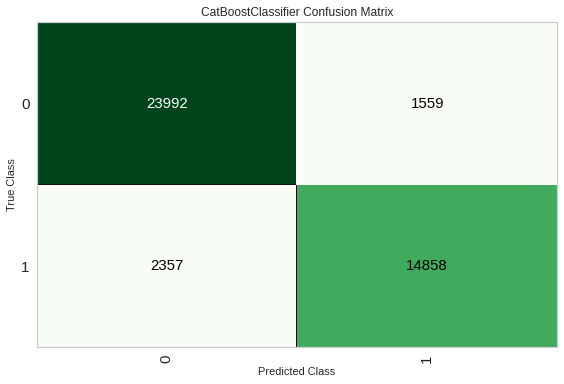

time: 493 ms


In [ ]:
#confusion matrix and cost function
plot_model(tuned_catboost_f1, plot = 'confusion_matrix')

In [ ]:
## print cost value
print("the cost assiciate to the tuned model is ${}".format(cost(2357,1559))) #cost(FN, FP):


the cost assiciate to the tuned model is $1194090
time: 972 µs


looking at the two catboost turned model based on recall and  f1 score , we can clearly see that the both give the same performance 

In [ ]:
#### third model logistic regression

time: 620 µs


### 1. Logistic Regression

####        a. create a model        

In [ ]:
## train and test model using CV of 10 fold
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6988,0.7425,0.5417,0.6494,0.5907,0.3554,0.3591
1,0.7056,0.7518,0.5669,0.6534,0.6071,0.3736,0.3760
2,0.6965,0.7379,0.5415,0.6450,0.5887,0.3511,0.3545
3,0.7038,0.7453,0.5433,0.6585,0.5954,0.3651,0.3693
4,0.6930,0.7372,0.5346,0.6405,0.5828,0.3430,0.3465
5,0.6953,0.7279,0.5376,0.6439,0.5860,0.3480,0.3515
6,0.7053,0.7573,0.5593,0.6554,0.6036,0.3714,0.3743
7,0.6924,0.7415,0.5481,0.6352,0.5884,0.3450,0.3474
8,0.6951,0.7396,0.5463,0.6408,0.5898,0.3497,0.3525
9,0.6977,0.7425,0.5533,0.6433,0.5950,0.3560,0.3586


time: 13.7 s


In [ ]:
# print  basic model
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 1.96 ms


#### b. Tune a model

In [ ]:
 #tune the model using auto gridsearch
 #based on user cost function the minimal cost is achieve using a highest recall
 #tuned using recall
 tuned_lr = tune_model(lr, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7014,0.7528,0.6801,0.6158,0.6463,0.3890,0.3905
1,0.7033,0.7560,0.6951,0.6153,0.6528,0.3954,0.3976
2,0.7042,0.7522,0.6878,0.6180,0.6511,0.3956,0.3973
3,0.7048,0.7522,0.6787,0.6207,0.6484,0.3949,0.3960
4,0.6928,0.7380,0.6538,0.6090,0.6306,0.3682,0.3688
5,0.7001,0.7498,0.6850,0.6129,0.6469,0.3876,0.3894
6,0.7066,0.7615,0.6907,0.6207,0.6538,0.4005,0.4022
7,0.7011,0.7534,0.6925,0.6129,0.6502,0.3910,0.3933
8,0.7006,0.7485,0.6850,0.6137,0.6474,0.3887,0.3904
9,0.6990,0.7486,0.6862,0.6113,0.6466,0.3860,0.3880


time: 50 s


In [ ]:
#print model parameter
print(tuned_lr)

LogisticRegression(C=0.024, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 1.53 ms


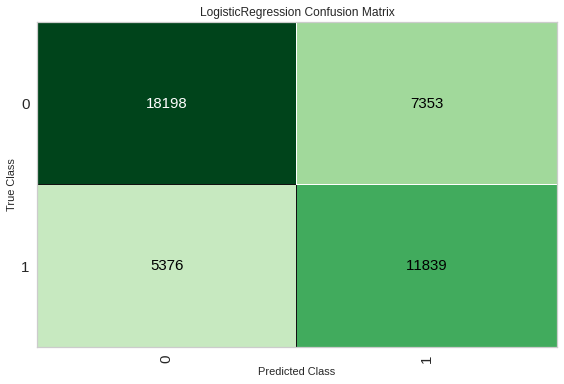

time: 562 ms


In [ ]:
#confusion matrix and cost function
plot_model(tuned_lr, plot = 'confusion_matrix')

In [ ]:
## print cost value
print("the cost assiciate to the tuned model is ${}".format(cost(5376,7353))) #cost(FN, FP):

the cost assiciate to the tuned model is $2761530
time: 995 µs


In [ ]:
# tune using f1 score 
tuned_lr_f1 = tune_model(lr, optimize = 'f1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7014,0.7528,0.6801,0.6158,0.6463,0.3890,0.3905
1,0.7033,0.7560,0.6951,0.6153,0.6528,0.3954,0.3976
2,0.7042,0.7522,0.6878,0.6180,0.6511,0.3956,0.3973
3,0.7048,0.7522,0.6787,0.6207,0.6484,0.3949,0.3960
4,0.6928,0.7380,0.6538,0.6090,0.6306,0.3682,0.3688
5,0.7001,0.7498,0.6850,0.6129,0.6469,0.3876,0.3894
6,0.7066,0.7615,0.6907,0.6207,0.6538,0.4005,0.4022
7,0.7011,0.7534,0.6925,0.6129,0.6502,0.3910,0.3933
8,0.7006,0.7485,0.6850,0.6137,0.6474,0.3887,0.3904
9,0.6990,0.7486,0.6862,0.6113,0.6466,0.3860,0.3880


time: 49.3 s


In [ ]:
#print model parameter
print(tuned_lr_f1)

LogisticRegression(C=0.024, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 1.39 ms


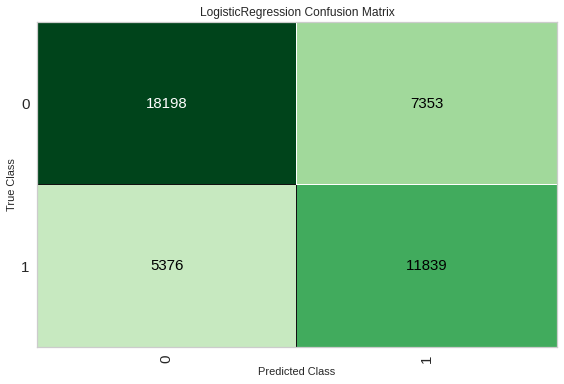

time: 558 ms


In [ ]:
#confusion matrix and cost function
plot_model(tuned_lr_f1, plot = 'confusion_matrix')

In [ ]:
## print cost value
print("the cost assiciate to the tuned model is ${}".format(cost(5376,7353))) #cost(FN, FP):


the cost assiciate to the tuned model is $2761530
time: 1.09 ms


looking at the two Logistic regression  turned model based on recall and  f1 score , we can clearly see that the both give the same performance 

## COMPARING FINE TUNE MODEL
We notice that the  result from the turned on Catboost and Logistic regresssion give us the same cost estimate using either F1 or Recall metric criteria. On the hand we can see the Random Forest optimized between recall and F1 produced different cost estimate, Where  the  best F1 score of  0.74  give a cost of $2 221650 and the best recall of 1.0  give a cost of  255510 . Since we  cost reduction is the main objective, we will go ahead and use  the turned random forest with recall value of 1  as the  best model since it give the lowest cost as the final mode

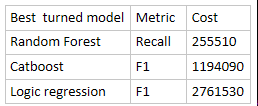


## Analize Final Model

### 1. model hyper paramters:

In [ ]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,balanced
criterion,gini
max_depth,9
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_impurity_split,None


time: 290 ms


### 2. plot model

#####              Using AUC

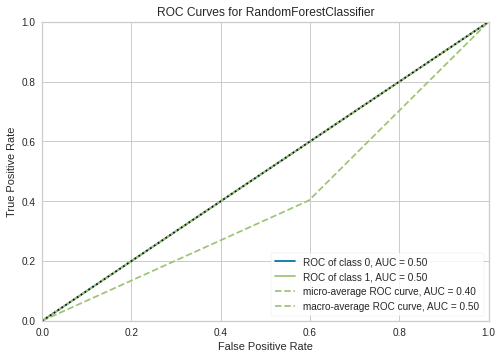

time: 915 ms


In [ ]:
plot_model(tuned_rf, plot = 'auc')

##### Using Precision -Recall

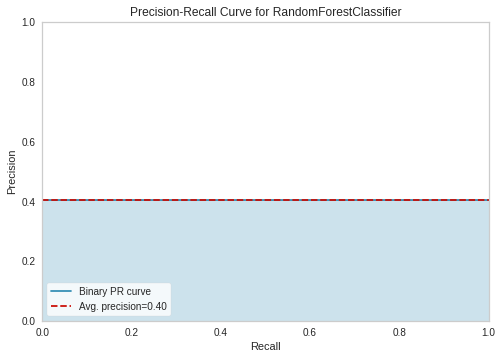

time: 815 ms


In [ ]:
plot_model(tuned_rf, plot = 'pr')

#### 3. Feature importance

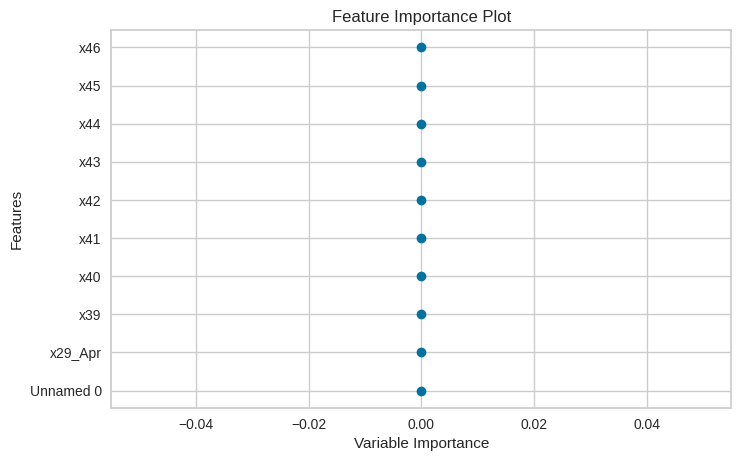

time: 528 ms


In [ ]:
plot_model(tuned_rf, plot='feature')

#### 4.0 Predict on test / hold-out Sample
Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set to evaluate the final model  cost and performance on the 30% of data(42766) that has been seperated of the data has been separated out as test/hold-out sample.



In [ ]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4025,0.5,1.0,0.4025,0.574,0.0,0.0


time: 694 ms


In [ ]:
 interpret_model(tuned_rf)

#### 5.0 Finalize Model for Deployment

In [ ]:
final_rf = finalize_model(tuned_rf)

#### 6.0 Predict on unseen data

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()


#### 7.0 cost of the  unseen data


In [ ]:
# cost(TN, TF)